# **Santander**

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [95]:
train='train.csv'
test='test.csv'
sample_submision='sample_submission.csv'

In [96]:
df_train=pd.read_csv(train,sep=',')
df_test=pd.read_csv(test,sep=',')
df_sample=pd.read_csv(sample_submision,sep=',')

In [97]:
print(df_train.shape)
print(df_test.shape)

(76020, 371)
(75818, 370)


In [98]:
df_train['TARGET'].value_counts()

TARGET
0    73012
1     3008
Name: count, dtype: int64

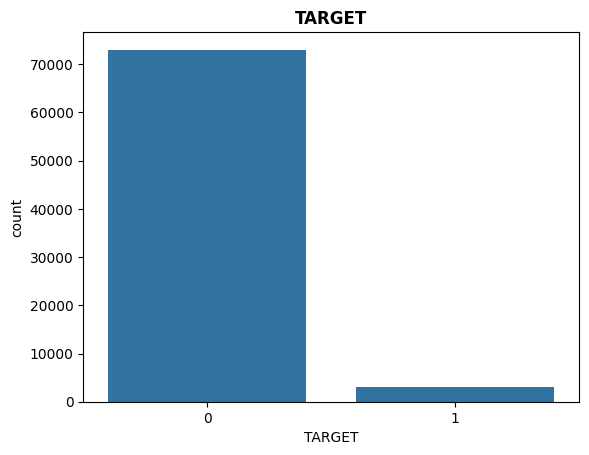

In [99]:
sns.countplot(data=df_train,x='TARGET')
plt.title('TARGET',fontsize=12,weight='bold')
plt.show()

In [100]:
df_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [101]:
print(df_train.isnull().sum().sum())
print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())

0
0
0


In [102]:
print(f'Primera version {df_train['var3'].value_counts(ascending=False).head()}')
df_train['var3'].replace(-999999,2,inplace=True)
print(f'Segunda version {df_train['var3'].value_counts(ascending=False).head()}')

Primera version var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
Name: count, dtype: int64
Segunda version var3
2    74281
8      138
9      110
3      108
1      105
Name: count, dtype: int64


In [103]:
df_train.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [105]:
X = df_train.drop(columns=['TARGET', 'ID'])  # Una lista simple
y = df_train['TARGET']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 0,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60816, 369), (15204, 369), (60816,), (15204,))

## **XGBCLASSIFIER**

In [107]:
xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.05, random_state = 156) 
xgb.fit(X_train, y_train, early_stopping_rounds=100, eval_metric = "auc", eval_set = [(X_train, y_train), (X_test, y_test)])
y_pred = xgb.predict_proba(X_test)
y_pred

[0]	validation_0-auc:0.83789	validation_1-auc:0.82554
[1]	validation_0-auc:0.83964	validation_1-auc:0.82483
[2]	validation_0-auc:0.83972	validation_1-auc:0.82542
[3]	validation_0-auc:0.84011	validation_1-auc:0.82605
[4]	validation_0-auc:0.84134	validation_1-auc:0.82950
[5]	validation_0-auc:0.84338	validation_1-auc:0.83004
[6]	validation_0-auc:0.84458	validation_1-auc:0.83061
[7]	validation_0-auc:0.84551	validation_1-auc:0.82958
[8]	validation_0-auc:0.84707	validation_1-auc:0.83005
[9]	validation_0-auc:0.84748	validation_1-auc:0.83028
[10]	validation_0-auc:0.84808	validation_1-auc:0.83132
[11]	validation_0-auc:0.84852	validation_1-auc:0.83155
[12]	validation_0-auc:0.84871	validation_1-auc:0.83205
[13]	validation_0-auc:0.84892	validation_1-auc:0.83192
[14]	validation_0-auc:0.84969	validation_1-auc:0.83218
[15]	validation_0-auc:0.85182	validation_1-auc:0.83341
[16]	validation_0-auc:0.85307	validation_1-auc:0.83378
[17]	validation_0-auc:0.85366	validation_1-auc:0.83455
[18]	validation_0-au

array([[0.99430317, 0.00569681],
       [0.97926885, 0.02073113],
       [0.98948354, 0.01051649],
       ...,
       [0.9106242 , 0.08937577],
       [0.98039776, 0.01960225],
       [0.98340726, 0.01659276]], dtype=float32)

In [108]:
roc_auc_score(y_test, y_pred[:,1])

0.8419129125358057

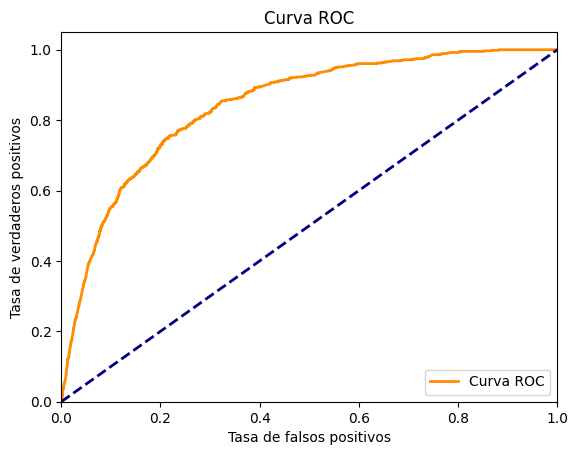

In [109]:
# Calcula la curva ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
# Gráfica la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [112]:
# test
df_test.drop(columns=['ID'],inplace=True)
pred_proba = xgb.predict_proba(df_test)
pred_proba

array([[0.96018136, 0.03981866],
       [0.9462586 , 0.05374137],
       [0.99449396, 0.00550603],
       ...,
       [0.9934462 , 0.00655381],
       [0.9169725 , 0.08302745],
       [0.9948161 , 0.00518386]], dtype=float32)

In [113]:
df_sample['TARGET'] = pred_proba[:,1]
df_sample.to_csv("submission.csv", index=False)

# **PCA-Scaler**

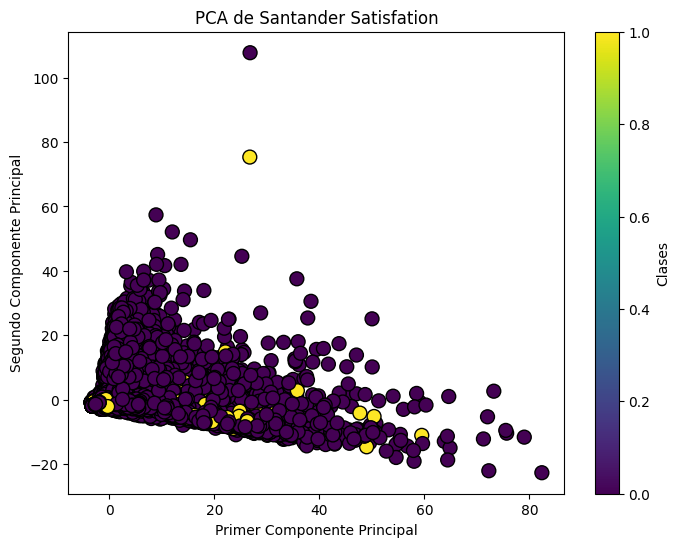

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
# Crear un gráfico de dispersión con las dos primeras componentes principales
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
# Etiquetas y título del gráfico
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('PCA de Santander Satisfation')
plt.colorbar(label='Clases')
plt.show()

In [115]:
print(f"Varianza explicada por cada componente {pca.explained_variance_ratio_}")
print("Varianza total explicada:", np.sum(pca.explained_variance_ratio_))

Varianza explicada por cada componente [0.08084426 0.05228955]
Varianza total explicada: 0.13313380922502152


In [116]:
print(f'Primer componentes {pca.explained_variance_ratio_[0]*100}')
print(f'Segunda componentes {pca.explained_variance_ratio_[1]*100}')
print("Varianza total explicada:", np.sum(pca.explained_variance_ratio_)*100)

Primer componentes 8.084426241198127
Segunda componentes 5.2289546813040255
Varianza total explicada: 13.313380922502152


## **PCA - Normalized**

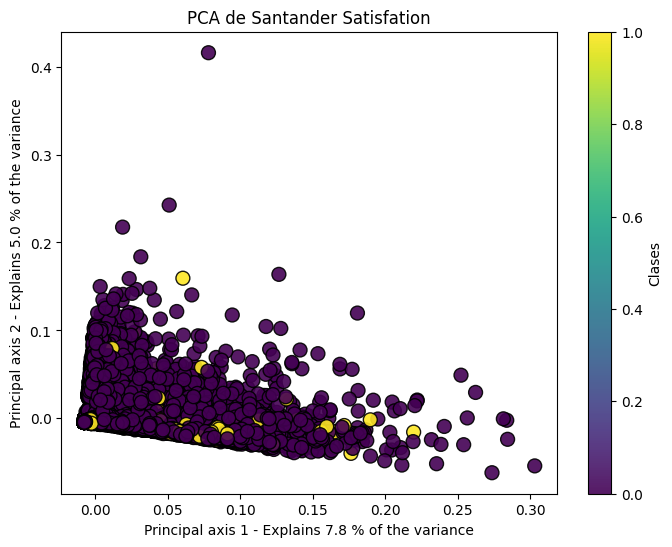

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import normalize
#scaler=StandardScaler()
X_normalized=normalize(X,axis=0)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_normalized)
# Crear un gráfico de dispersión con las dos primeras componentes principales
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100, alpha=0.9)
# Etiquetas y título del gráfico
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))
plt.title('PCA de Santander Satisfation')
plt.colorbar(label='Clases')
plt.show()

In [118]:
n_features_originally = df_train.shape[1]
selector = VarianceThreshold()
selector.fit(df_train)

VarianceThreshold()

In [119]:
# Get the indices of zero variance feats
feat_ix_keep = selector.get_support(indices=True)
orig_feat_ix = np.arange(df_train.columns.size)
feat_ix_delete = np.delete(orig_feat_ix, feat_ix_keep)
# Delete zero variance feats from the original pandas data frame
data_frame = df_train.drop(labels=df_train.columns[feat_ix_delete],axis=1)
# Print info
n_features_deleted = feat_ix_delete.size
# Remove feature vectors containing one unique value,
# because such features do not have predictive value.
print("  - Deleted %s / %s features (~= %.1f %%)" % (
        n_features_deleted, n_features_originally,
        100.0 * ((n_features_deleted) / n_features_originally)))

  - Deleted 34 / 371 features (~= 9.2 %)


In [120]:
import itertools
n_features_originally = data_frame.shape[1]
# Find the names of identical features by going through all the
# combinations of features (each pair is compared only once).
feat_names_delete = []
for feat_1, feat_2 in itertools.combinations(
        iterable=data_frame.columns, r=2):
    if np.array_equal(data_frame[feat_1], data_frame[feat_2]):
        feat_names_delete.append(feat_2)
feat_names_delete = np.unique(feat_names_delete)
# Delete the identical features
data_frame = data_frame.drop(labels=feat_names_delete, axis=1)
n_features_deleted = len(feat_names_delete)
print("  - Deleted %s / %s features (~= %.1f %%)" % (
    n_features_deleted, n_features_originally,
    100.0 * ((n_features_deleted) / n_features_originally)))

  - Deleted 29 / 337 features (~= 8.6 %)


[0]	validation_0-auc:0.83791	validation_1-auc:0.82536
[1]	validation_0-auc:0.83961	validation_1-auc:0.82471
[2]	validation_0-auc:0.83991	validation_1-auc:0.82539
[3]	validation_0-auc:0.84026	validation_1-auc:0.82601
[4]	validation_0-auc:0.84163	validation_1-auc:0.82945
[5]	validation_0-auc:0.84367	validation_1-auc:0.82986
[6]	validation_0-auc:0.84487	validation_1-auc:0.83053
[7]	validation_0-auc:0.84586	validation_1-auc:0.82934
[8]	validation_0-auc:0.84736	validation_1-auc:0.83004
[9]	validation_0-auc:0.84790	validation_1-auc:0.83038
[10]	validation_0-auc:0.84859	validation_1-auc:0.83135
[11]	validation_0-auc:0.84895	validation_1-auc:0.83184
[12]	validation_0-auc:0.84906	validation_1-auc:0.83215
[13]	validation_0-auc:0.84949	validation_1-auc:0.83215
[14]	validation_0-auc:0.85005	validation_1-auc:0.83243
[15]	validation_0-auc:0.85253	validation_1-auc:0.83356
[16]	validation_0-auc:0.85324	validation_1-auc:0.83362
[17]	validation_0-auc:0.85408	validation_1-auc:0.83458
[18]	validation_0-au

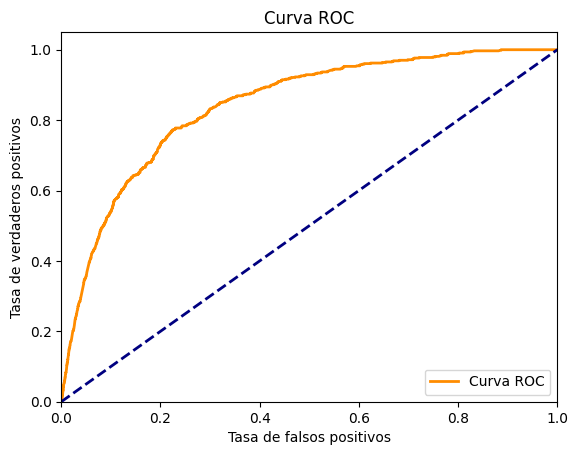

In [121]:
X=data_frame.drop(columns=['TARGET'])
y=data_frame['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 0,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.05, random_state = 156) 
xgb.fit(X_train, y_train, early_stopping_rounds=100, eval_metric = "auc", eval_set = [(X_train, y_train), (X_test, y_test)])
y_pred = xgb.predict_proba(X_test)
# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
# Gráfica la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [122]:
roc_auc_score(y_test, y_pred[:,1])

0.841423921068528